In [14]:
import requests
import rasterio
import pandas as pd
from shapely.geometry import Polygon
from pystac_client import Client
from planetary_computer import sign

# Step 1: Define your AOI Polygon (example coordinates)
aoi = Polygon([
    [-105.55, 40.03],  # bottom-left corner
    [-105.55, 40.04],  # top-left corner
    [-105.54, 40.04],  # top-right corner
    [-105.54, 40.03],  # bottom-right corner
    [-105.55, 40.03]   # back to bottom-left to close the polygon
])

# Step 2: Define the STAC API endpoint for Planetary Computer
stac_api_url = "https://planetarycomputer.microsoft.com/api/stac/v1"

# Initialize the STAC client
client = Client.open(stac_api_url)

# Step 3: Search for Landsat data
search = client.search(
    collections=["landsat-8-c2-l2"],
    intersects=aoi,
    datetime="2021-01-01/2021-12-31",
    limit=1  # Adjust based on your need
)

# Step 4: Retrieve the items using item_collection()
items = search.item_collection()

if not items:
    print("No items found.")
    exit()

item = items.items[0]  # Use the first item found

# Step 5: Define the bands you want to retrieve
bands = ["SR_B1", "SR_B2", "SR_B3", "SR_B4", "SR_B5", "SR_B6", "SR_B7"]

# Prepare a list to hold the data
data = []

# Step 6: Loop through each band, read the data, and collect it in the table
for band in bands:
    if band in item.assets:
        asset = item.assets[band]
        signed_href = sign(asset.href)  # Sign the URL using Planetary Computer's helper function

        # Read the raster data using rasterio
        with rasterio.open(signed_href) as src:
            band_data = src.read(1).flatten()  # Read and flatten the data to a 1D array
            band_labels = [band] * len(band_data)  # Create a list of the band name repeated for each pixel

            # Combine the band label and the reflectance values
            data.extend(zip(band_labels, band_data))
    else:
        print(f"Band {band} not found in the item.")

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data, columns=['band', 'Landsat 8'])



In [15]:
df.to_csv("landsat_reflectance_data.csv", index=True)

In [23]:
df2 = pd.read_csv('landsat_reflectance_data.csv')
print(df2)


           Unnamed: 0   band  Landsat 8
0                   0  SR_B1          0
1                   1  SR_B1          0
2                   2  SR_B1          0
3                   3  SR_B1          0
4                   4  SR_B1          0
...               ...    ...        ...
431442202   431442202  SR_B7          0
431442203   431442203  SR_B7          0
431442204   431442204  SR_B7          0
431442205   431442205  SR_B7          0
431442206   431442206  SR_B7          0

[431442207 rows x 3 columns]


<Figure size 1000x600 with 0 Axes>

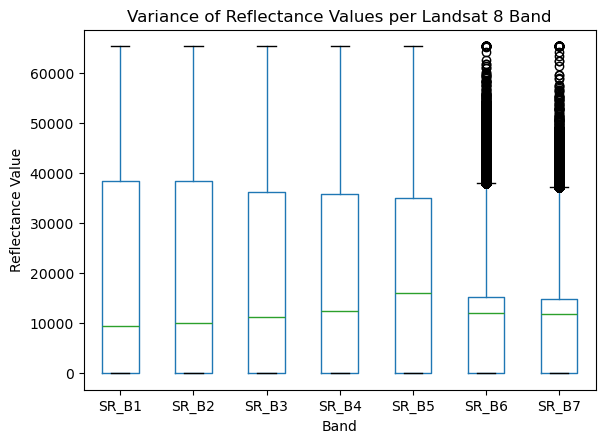

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded with 'band' and 'Landsat 8' reflectance values
# Creating a box and whisker plot

plt.figure(figsize=(10, 6))
df.boxplot(column='Landsat 8', by='band', grid=False)
plt.title('Variance of Reflectance Values per Landsat 8 Band')
plt.suptitle('')  # Suppress the automatic title from pandas
plt.xlabel('Band')
plt.ylabel('Reflectance Value')
plt.show()


In [24]:

pivoted_df = df2.pivot(columns='band', values='Landsat 8')

# Resetting the index if necessary
pivoted_df.reset_index(drop=True, inplace=True)

# Display the pivoted DataFrame
print(pivoted_df)


/tmp/ipykernel_86253/3314930205.py:1: PerformanceWarning: The following operation may generate 3020095449 cells in the resulting pandas object.
  pivoted_df = df2.pivot(columns='band', values='Landsat 8')


band       SR_B1  SR_B2  SR_B3  SR_B4  SR_B5  SR_B6  SR_B7
0            0.0    NaN    NaN    NaN    NaN    NaN    NaN
1            0.0    NaN    NaN    NaN    NaN    NaN    NaN
2            0.0    NaN    NaN    NaN    NaN    NaN    NaN
3            0.0    NaN    NaN    NaN    NaN    NaN    NaN
4            0.0    NaN    NaN    NaN    NaN    NaN    NaN
...          ...    ...    ...    ...    ...    ...    ...
431442202    NaN    NaN    NaN    NaN    NaN    NaN    0.0
431442203    NaN    NaN    NaN    NaN    NaN    NaN    0.0
431442204    NaN    NaN    NaN    NaN    NaN    NaN    0.0
431442205    NaN    NaN    NaN    NaN    NaN    NaN    0.0
431442206    NaN    NaN    NaN    NaN    NaN    NaN    0.0

[431442207 rows x 7 columns]


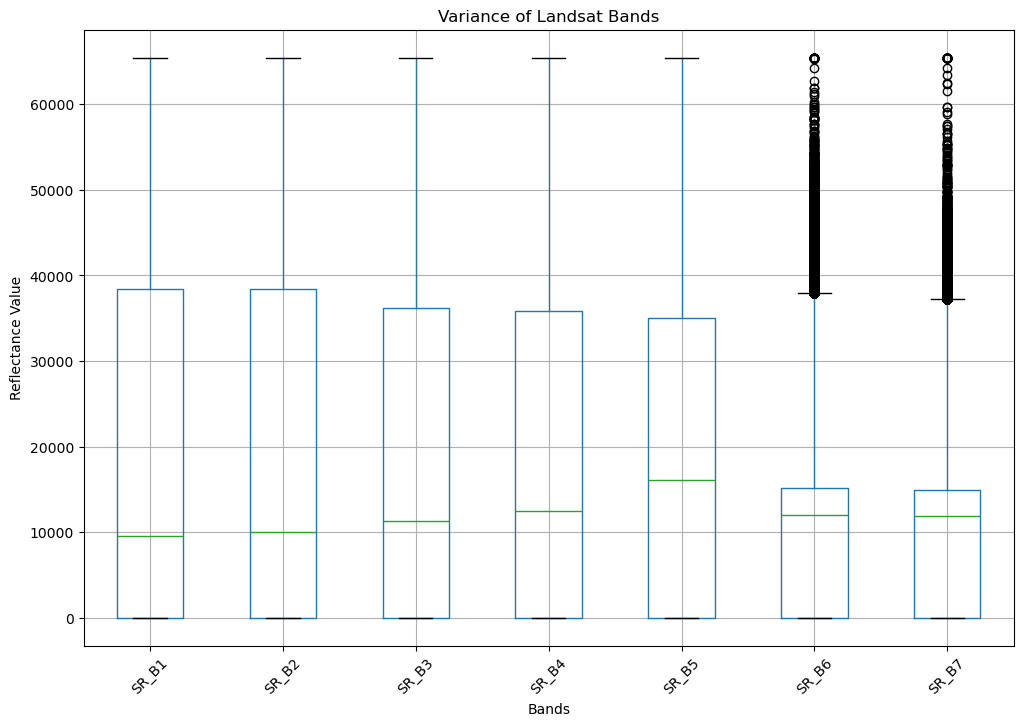

In [31]:
plt.figure(figsize=(12, 8))
pivoted_df.boxplot()
plt.title('Variance of Landsat Bands')
plt.ylabel('Reflectance Value')
plt.xlabel('Bands')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(True)
plt.show()

In [19]:
df2 = pd.read_csv('polygon_spectra.csv', nrows=1000)
print(df2)

     Pixel_Row  Pixel_Col                                GlobalID  \
0         1222        554  {E9346797-777A-4D43-BD01-02A511C57DAA}   
1         1222        555  {E9346797-777A-4D43-BD01-02A511C57DAA}   
2         1223        554  {E9346797-777A-4D43-BD01-02A511C57DAA}   
3         1223        555  {E9346797-777A-4D43-BD01-02A511C57DAA}   
4         1224        558  {54D1A59F-2B5C-4D76-913A-690314E314A7}   
..         ...        ...                                     ...   
995       7480        237  {E56C8965-D522-44DB-8E88-D299A343353F}   
996       7480        238  {E56C8965-D522-44DB-8E88-D299A343353F}   
997       7471        265  {6346CB33-A70A-44AE-8992-ACB7B7D3556B}   
998       7471        266  {6346CB33-A70A-44AE-8992-ACB7B7D3556B}   
999       7472        265  {6346CB33-A70A-44AE-8992-ACB7B7D3556B}   

                  CreationDate                     Creator  \
0    2023-06-20 19:27:29+00:00  Tyler.L.McIntosh_ucboulder   
1    2023-06-20 19:27:29+00:00  Tyler.L.McIntos

In [27]:
df_polygons = pd.read_csv('polygon_spectra.csv')

# Select columns that start with 'Landsat_8_band_'
landsat_columns = df_polygons.filter(like='Landsat_8_band_', axis=1) * 10

# Display or work with the filtered DataFrame
print(landsat_columns)

       Landsat_8_band_1  Landsat_8_band_2  Landsat_8_band_3  Landsat_8_band_4  \
0           1491.786865       2154.191501       1454.511193      25599.325342   
1           1275.342213       1768.172584       1155.060160      23169.642856   
2           1821.751986       2795.807257       1968.044897      32741.493624   
3           1652.872638       2469.774362       1721.801904      30480.002413   
4           1635.899785       2316.441593       1770.173383      22428.139799   
...                 ...               ...               ...               ...   
14485       2375.110299       4270.575606       3521.480890      26080.098179   
14486       2384.291174       4287.271741       3537.831629      26189.260127   
14487       2674.566520       4540.277541       4248.650513      22590.852935   
14488       1704.769582       3034.338464       2343.903099      16967.765146   
14489       3517.492867       5405.507759       6224.315152      21347.708545   

       Landsat_8_band_5  La

/tmp/ipykernel_86253/1870420841.py:1: DtypeWarning: Columns (7,10,13,14,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_polygons = pd.read_csv('polygon_spectra.csv')


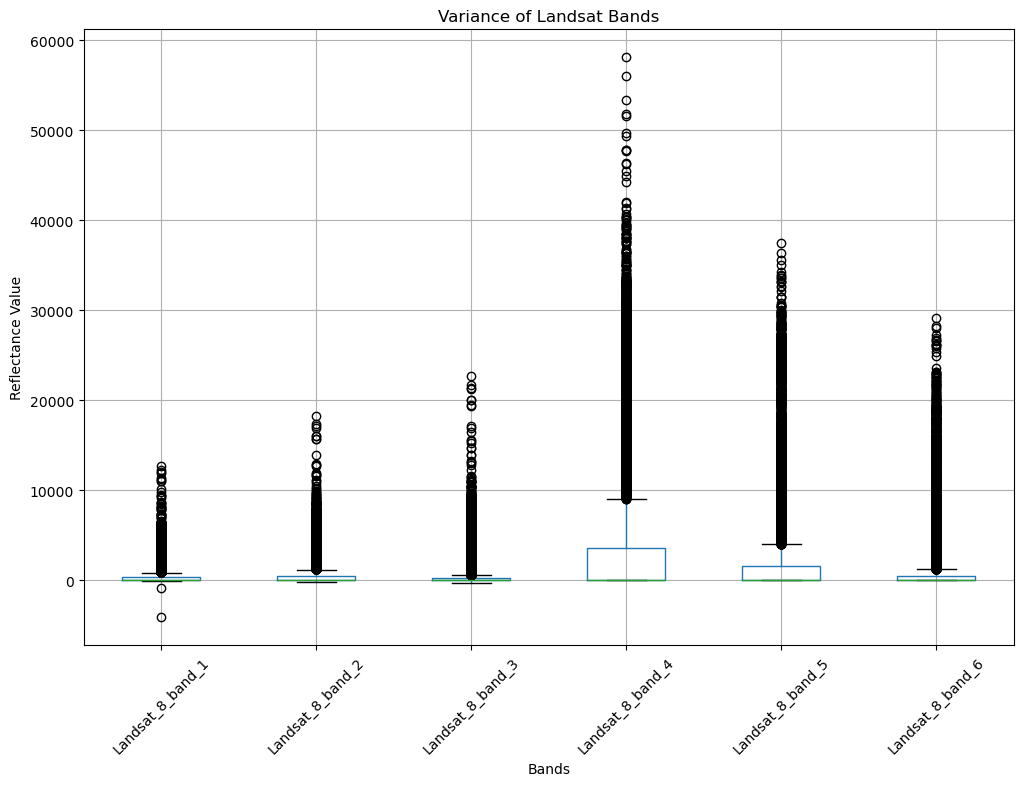

In [28]:
plt.figure(figsize=(12, 8))
landsat_columns.boxplot()
plt.title('Variance of Landsat Bands')
plt.ylabel('Reflectance Value')
plt.xlabel('Bands')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(True)
plt.show()

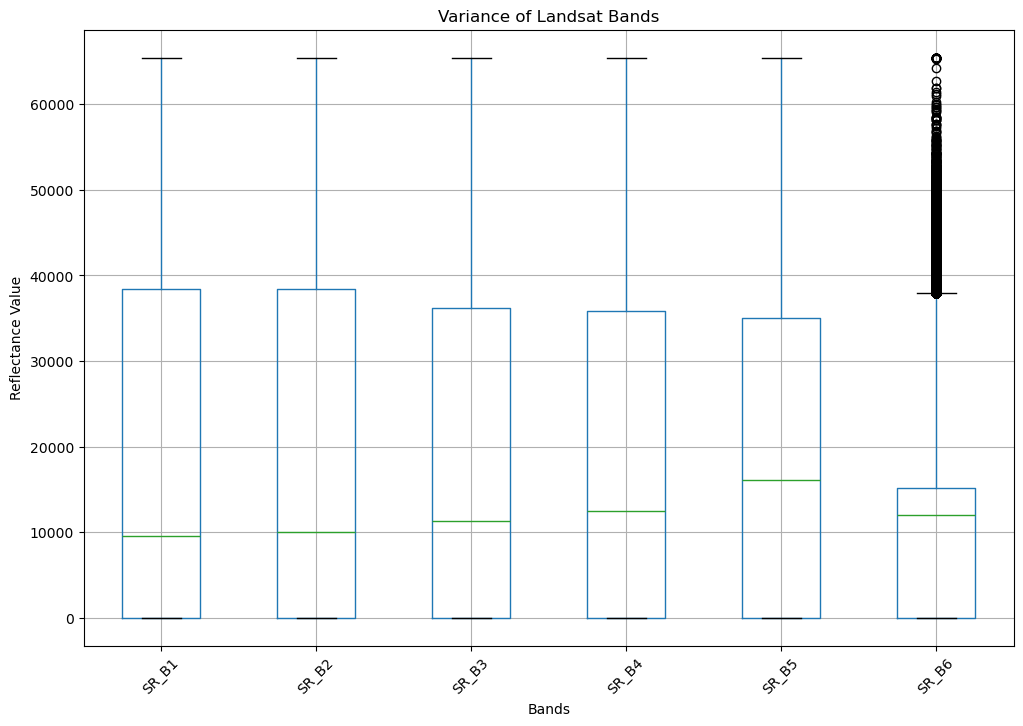

In [33]:

plt.figure(figsize=(12, 8))
pivoted_df[["SR_B1",  "SR_B2"  ,"SR_B3"  ,"SR_B4"  ,"SR_B5"  ,"SR_B6"]].boxplot()
plt.title('Variance of Landsat Bands')
plt.ylabel('Reflectance Value')
plt.xlabel('Bands')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(True)
plt.show()

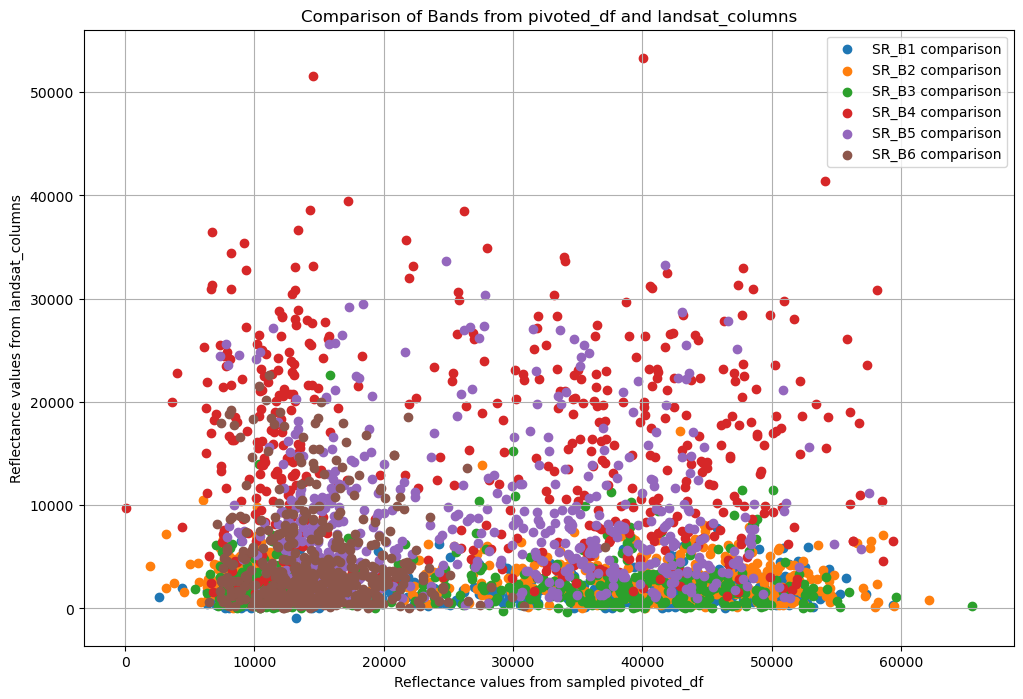

In [43]:
# Remove rows where any of the selected bands in pivoted_df are 0
pivoted_df_no_zeros = pivoted_df[(pivoted_df[['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6']] != 0).all(axis=1)]

# Remove rows where any of the selected bands in renamed_landsat_columns are 0
landsat_columns_no_zeros = renamed_landsat_columns[(renamed_landsat_columns != 0).all(axis=1)]

# Ensure both dataframes have the same length by sampling pivoted_df_no_zeros
sampled_pivoted_df = pivoted_df_no_zeros.sample(n=len(landsat_columns_no_zeros), random_state=42)

# List of corresponding bands
bands = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6']

# Plot corresponding bands from both dataframes
plt.figure(figsize=(12, 8))

for band in bands:
    plt.scatter(sampled_pivoted_df[band], landsat_columns_no_zeros[band], label=f'{band} comparison')

plt.title('Comparison of Bands from pivoted_df and landsat_columns')
plt.xlabel('Reflectance values from sampled pivoted_df')
plt.ylabel('Reflectance values from landsat_columns')
plt.legend()
plt.grid(True)
plt.show()


Columns in pivoted_df: ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7']
Columns in renamed_landsat_columns: ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6']


/tmp/ipykernel_86253/1217147007.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(bands))


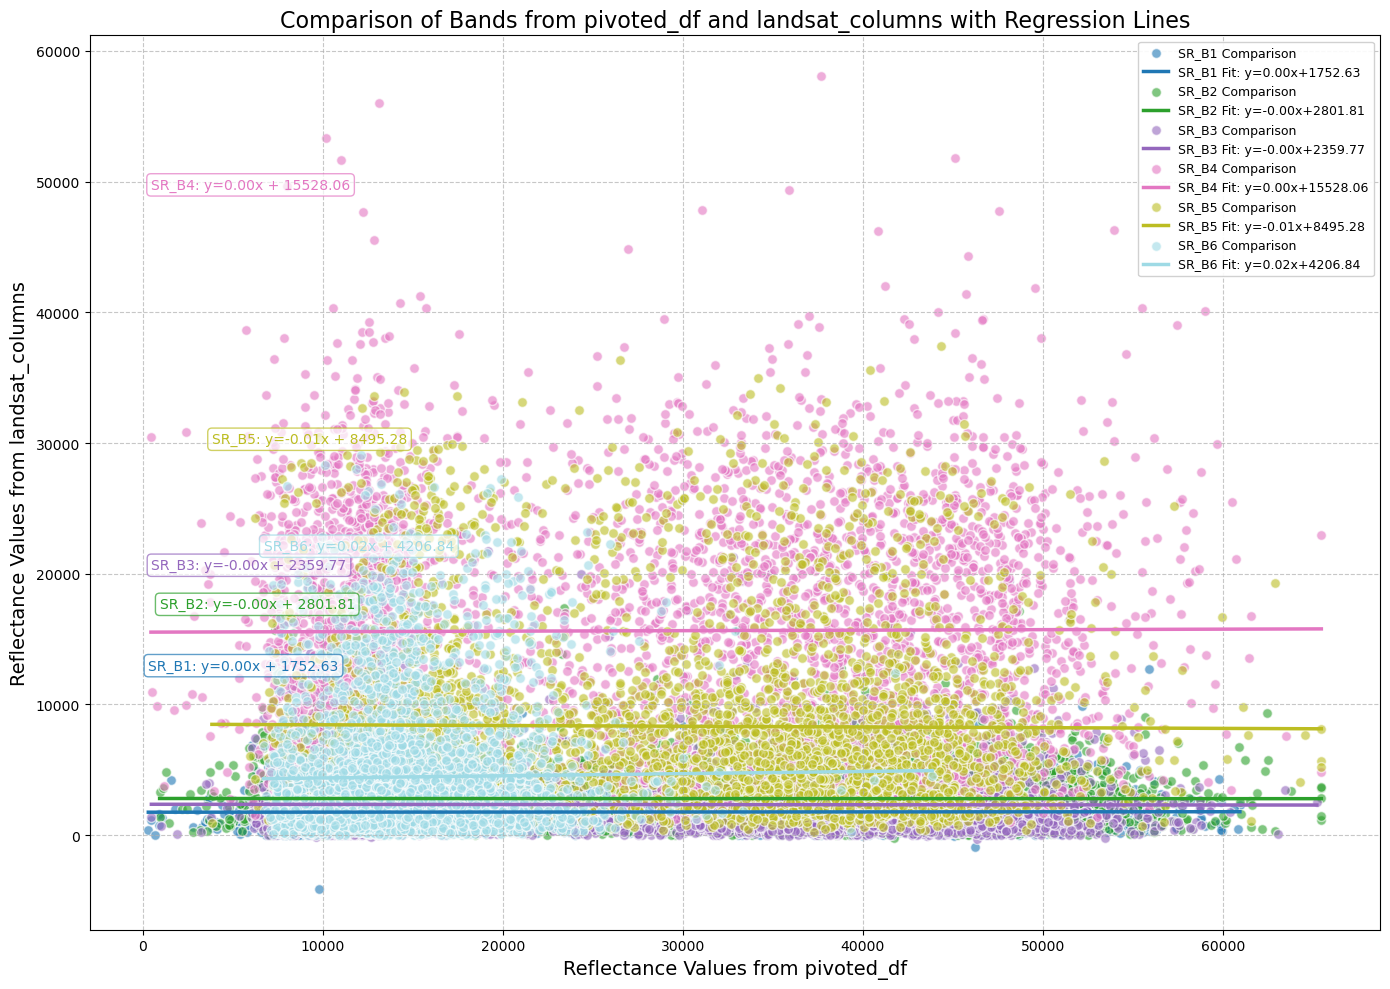

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# --- Step 1: Rename Columns in renamed_landsat_columns ---

# Define the mapping from original to desired column names
rename_mapping = {
    'Landsat_8_band_1': 'SR_B1',
    'Landsat_8_band_2': 'SR_B2',
    'Landsat_8_band_3': 'SR_B3',
    'Landsat_8_band_4': 'SR_B4',
    'Landsat_8_band_5': 'SR_B5',
    'Landsat_8_band_6': 'SR_B6'
}

# Rename the columns in renamed_landsat_columns
renamed_landsat_columns = renamed_landsat_columns.rename(columns=rename_mapping)

# Verify the renaming
print("Columns in pivoted_df:", pivoted_df.columns.tolist())
print("Columns in renamed_landsat_columns:", renamed_landsat_columns.columns.tolist())

# --- Step 2: Data Cleaning and Plotting per Band ---

# Define the list of bands to process
bands = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6']

# Define a color palette with more distinguishable colors
colors = plt.cm.get_cmap('tab20', len(bands))

# Initialize the plot
plt.figure(figsize=(14, 10))

for i, band in enumerate(bands):
    # Select rows where both DataFrames have non-NaN and non-zero values for the current band
    pivot_band = pivoted_df[['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6']].copy()
    landsat_band = renamed_landsat_columns[['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6']].copy()
    
    # Drop rows with NaNs in the current band
    pivot_band = pivot_band[['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6']].dropna(subset=[band])
    landsat_band = landsat_band[['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6']].dropna(subset=[band])
    
    # Remove rows with zeros in the current band
    pivot_band = pivot_band[pivot_band[band] != 0]
    landsat_band = landsat_band[landsat_band[band] != 0]
    
    # Determine the number of valid rows
    len_pivot = len(pivot_band)
    len_landsat = len(landsat_band)
    
    if len_pivot == 0 or len_landsat == 0:
        print(f"No valid data available for {band} after cleaning.")
        continue  # Skip to the next band
    
    # Sample the larger DataFrame down to the size of the smaller one
    if len_pivot > len_landsat:
        sampled_pivot = pivot_band.sample(n=len_landsat, random_state=42).reset_index(drop=True)
        sampled_landsat = landsat_band.reset_index(drop=True)
    else:
        sampled_landsat = landsat_band.sample(n=len_pivot, random_state=42).reset_index(drop=True)
        sampled_pivot = pivot_band.reset_index(drop=True)
    
    # Ensure both sampled DataFrames have the same length
    min_length = min(len(sampled_pivot), len(sampled_landsat))
    sampled_pivot = sampled_pivot.iloc[:min_length]
    sampled_landsat = sampled_landsat.iloc[:min_length]
    
    # Extract the values for the current band
    x = sampled_pivot[band]
    y = sampled_landsat[band]
    
    # Define color for the current band
    color = colors(i)
    
    # Scatter plot for the current band
    plt.scatter(x, y, label=f'{band} Comparison', color=color, alpha=0.6, edgecolors='w', s=50)
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Check for finite slope and intercept
    if np.isfinite(slope) and np.isfinite(intercept):
        # Generate points for the regression line
        x_fit = np.linspace(x.min(), x.max(), 100)
        y_fit = slope * x_fit + intercept
        
        # Plot the regression line with enhanced visibility
        plt.plot(x_fit, y_fit, color=color, linestyle='-', linewidth=2.5, 
                 label=f'{band} Fit: y={slope:.2f}x+{intercept:.2f}')
        
        # Annotate the plot with regression coefficients
        # Position the text at a slight offset to prevent overlap
        plt.text(x.min(), y.max() - (i * (y.max() - y.min()) * 0.05),
                 f'{band}: y={slope:.2f}x + {intercept:.2f}',
                 color=color, fontsize=10, 
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor=color, boxstyle='round,pad=0.3'))
    else:
        print(f"Warning: Regression could not be performed for band {band} due to insufficient data.")

# Customize the plot
plt.title('Comparison of Bands from pivoted_df and landsat_columns with Regression Lines', fontsize=16)
plt.xlabel('Reflectance Values from pivoted_df', fontsize=14)
plt.ylabel('Reflectance Values from landsat_columns', fontsize=14)
plt.legend(loc='best', fontsize=9, framealpha=0.9)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# --- Step 1: Rename Columns in renamed_landsat_columns ---

# Define the mapping from original to desired column names
rename_mapping = {
    'Landsat_8_band_1': 'SR_B1',
    'Landsat_8_band_2': 'SR_B2',
    'Landsat_8_band_3': 'SR_B3',
    'Landsat_8_band_4': 'SR_B4',
    'Landsat_8_band_5': 'SR_B5',
    'Landsat_8_band_6': 'SR_B6'
}

# Rename the columns in landsat_columns
renamed_landsat_columns = landsat_columns.rename(columns=rename_mapping)

# Verify the renaming
print("Columns in pivoted_df:", pivoted_df.columns.tolist())
print("Columns in renamed_landsat_columns:", renamed_landsat_columns.columns.tolist())

# --- Step 2: Select and Clean Data for Each Band Individually ---

# Define the list of bands to process
bands = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6']

# Initialize list to store cleaned data for each band
cleaned_data = []

for band in bands:
    print(f"\nProcessing {band}...")
    
    # Select the current band from both DataFrames
    pivot_band = pivoted_df[[band]].copy()
    landsat_band = renamed_landsat_columns[[band]].copy()
    
    # Remove rows with NaN or zero in the current band for both DataFrames
    pivot_valid = pivot_band.dropna()[pivot_band[band] != 0]
    landsat_valid = landsat_band.dropna()[landsat_band[band] != 0]
    
    # Determine the number of valid rows
    len_pivot = len(pivot_valid)
    len_landsat = len(landsat_valid)
    
    print(f"Valid rows in pivoted_df for {band}: {len_pivot}")
    print(f"Valid rows in renamed_landsat_columns for {band}: {len_landsat}")
    
    if len_pivot == 0 or len_landsat == 0:
        print(f"No valid data available for {band} after cleaning. Skipping this band.")
        continue  # Skip to the next band
    
    # Determine the maximum length
    max_length = max(len_pivot, len_landsat)
    
    # Reset indices to ensure proper alignment
    pivot_valid = pivot_valid.reset_index(drop=True)
    landsat_valid = landsat_valid.reset_index(drop=True)
    
    # Pad the shorter DataFrame with NaNs to match the length of the longer one
    if len_pivot < max_length:
        # Pad pivot_valid
        pivot_valid = pivot_valid.reindex(range(max_length))
    if len_landsat < max_length:
        # Pad landsat_valid
        landsat_valid = landsat_valid.reindex(range(max_length))
    
    print(f"After padding, pivoted_df for {band}: {len(pivot_valid)} rows")
    print(f"After padding, renamed_landsat_columns for {band}: {len(landsat_valid)} rows")
    
    # Extract band number from 'SR_B1', 'SR_B2', etc.
    # Assuming band format is 'SR_BX' where X is the band number
    band_number = band.split('B')[-1]
    
    # Rename columns to indicate their source with desired naming convention
    pivot_valid = pivot_valid.rename(columns={band: f'Landsat8_real_band_{band_number}'})
    landsat_valid = landsat_valid.rename(columns={band: f'Landsat8_sampled_band_{band_number}'})
    
    # Concatenate the sampled data for the current band
    combined_band = pd.concat([pivot_valid, landsat_valid], axis=1)
    
    # Append to the list
    cleaned_data.append(combined_band)

# --- Step 3: Combine All Bands into a Single DataFrame ---

# Combine all bands into a single DataFrame
if not cleaned_data:
    raise ValueError("No valid data available for any of the bands after cleaning.")
else:
    combined_df = pd.concat(cleaned_data, axis=1)

print("\nAll bands have been processed and combined.")

# --- Step 4: Save the Combined DataFrame as a CSV File ---

# Save the combined DataFrame to a CSV file
combined_df.to_csv("NIWO_landsat8_compare.csv", index=False)

print("\nCombined dataframe saved as 'NIWO_landsat8_compare.csv'.")


Columns in pivoted_df: ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7']
Columns in renamed_landsat_columns: ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6']

Processing SR_B1...


/tmp/ipykernel_86253/2832611204.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pivot_valid = pivot_band.dropna()[pivot_band[band] != 0]


Valid rows in pivoted_df for SR_B1: 40403060
Valid rows in renamed_landsat_columns for SR_B1: 3891
After padding, pivoted_df for SR_B1: 40403060 rows
After padding, renamed_landsat_columns for SR_B1: 40403060 rows

Processing SR_B2...


/tmp/ipykernel_86253/2832611204.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pivot_valid = pivot_band.dropna()[pivot_band[band] != 0]


Valid rows in pivoted_df for SR_B2: 40416668
Valid rows in renamed_landsat_columns for SR_B2: 3891
After padding, pivoted_df for SR_B2: 40416668 rows
After padding, renamed_landsat_columns for SR_B2: 40416668 rows

Processing SR_B3...


/tmp/ipykernel_86253/2832611204.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pivot_valid = pivot_band.dropna()[pivot_band[band] != 0]


Valid rows in pivoted_df for SR_B3: 40479236
Valid rows in renamed_landsat_columns for SR_B3: 3891
After padding, pivoted_df for SR_B3: 40479236 rows
After padding, renamed_landsat_columns for SR_B3: 40479236 rows

Processing SR_B4...


/tmp/ipykernel_86253/2832611204.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pivot_valid = pivot_band.dropna()[pivot_band[band] != 0]


Valid rows in pivoted_df for SR_B4: 40473371
Valid rows in renamed_landsat_columns for SR_B4: 3891
After padding, pivoted_df for SR_B4: 40473371 rows
After padding, renamed_landsat_columns for SR_B4: 40473371 rows

Processing SR_B5...


/tmp/ipykernel_86253/2832611204.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pivot_valid = pivot_band.dropna()[pivot_band[band] != 0]


Valid rows in pivoted_df for SR_B5: 40490139
Valid rows in renamed_landsat_columns for SR_B5: 3891
After padding, pivoted_df for SR_B5: 40490139 rows
After padding, renamed_landsat_columns for SR_B5: 40490139 rows

Processing SR_B6...


/tmp/ipykernel_86253/2832611204.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pivot_valid = pivot_band.dropna()[pivot_band[band] != 0]


Valid rows in pivoted_df for SR_B6: 40490193
Valid rows in renamed_landsat_columns for SR_B6: 3891
After padding, pivoted_df for SR_B6: 40490193 rows
After padding, renamed_landsat_columns for SR_B6: 40490193 rows

All bands have been processed and combined.


In [ ]:
landsat8 = pd.read_csv('NIWO_landsat8_compare.csv')
print(landsat8)